# 10ALYTICS DATA SCIENCE INTERNSHIP 

## JOB POST ANALYSIS AND REPORT 

# PROJECT OBJECTIVE

- ❑ Utilize Python libraries and tools to perform exploratory data analysis
(EDA) on the collected job data.
- ❑ Identify trends, patterns, and insights related to the different technology
jobs.
- ❑ Visualize the analysis results using appropriate charts, graphs, and visual
representations.

In [1]:
# Importing the rquired libraries 


import pandas as pd # For numerical operations and array manipulation
import numpy as np
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import missingno as msno # Missing data - Data Visualization
from collections import Counter # For convenient data structures such as Counter for counting occurrences.
from datetime import datetime # For working with dates and times.
import plotly.express as px # An interactive visualization library
!pip install wordcloud
from wordcloud import WordCloud #  For generating word clouds to visualize word frequency


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("transformed_jobs_data.csv")
df.head(3)

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,Montréal,CA,2023-12-19 20:22:04,NaN,NaN
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,NaN,CA,2023-12-19 15:55:49,NaN,NaN
2,Oiu186OT5E6bkZReAAAAAA==,FULLTIME,"2024 RBCIS, Summer Co-op Data Engineer / Full ...",https://ca.linkedin.com/jobs/view/2024-rbcis-s...,Job Summary\n\nJob Description\n\nWhat is the ...,Toronto,CA,2023-12-19 22:30:06,http://www.rbc.com,Finance


In [3]:
df.tail(3)

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
163,TvhAbNPDfD24fyHVAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Fort Worth,US,2023-12-19 11:52:55,http://www.bdo.com,Consulting
164,6N_3eAHv_8HXYM0cAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Columbus,US,2023-12-19 12:15:04,http://www.bdo.com,Consulting
165,iQu2KNPFHbJstSZuAAAAAA==,FULLTIME,Senior Cloud Data Engineer,https://www.linkedin.com/jobs/view/senior-clou...,Job Description\n\nJob Summary:\n\nThis positi...,Fort Lauderdale,US,2023-12-19 12:11:14,http://www.bdo.com,Consulting


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   job_id                   166 non-null    object
 1   job_employment_type      166 non-null    object
 2   job_title                166 non-null    object
 3   job_apply_link           166 non-null    object
 4   job_description          166 non-null    object
 5   job_city                 128 non-null    object
 6   job_country              166 non-null    object
 7   job_posted_at_timestamp  166 non-null    object
 8   employer_website         113 non-null    object
 9   employer_company_type    76 non-null     object
dtypes: object(10)
memory usage: 13.1+ KB


In [5]:
df.describe().T

,count,unique,top,freq
job_id,166,166,XX6946dvNO3187IkAAAAAA==,1
job_employment_type,166,4,FULLTIME,153
job_title,166,99,Data Engineer,31
job_apply_link,166,166,https://ca.linkedin.com/jobs/view/data-enginee...,1
job_description,166,153,Job Description\n\nJob Summary:\n\nThis positi...,14
job_city,128,70,London,29
job_country,166,3,US,73
job_posted_at_timestamp,166,154,2023-12-20 00:00:00,7
employer_website,113,88,http://www.bdo.com,14
employer_company_type,76,13,Finance,18


In [6]:
df.isnull().sum() # verify if there are still missing values

job_id                      0
job_employment_type         0
job_title                   0
job_apply_link              0
job_description             0
job_city                   38
job_country                 0
job_posted_at_timestamp     0
employer_website           53
employer_company_type      90
dtype: int64

In [7]:
df.nunique()

job_id                     166
job_employment_type          4
job_title                   99
job_apply_link             166
job_description            153
job_city                    70
job_country                  3
job_posted_at_timestamp    154
employer_website            88
employer_company_type       13
dtype: int64

# Observations 
- job_employment_type has 4 categories with Fulltime category having the highest freq of 153
- job_title has 99 categories with Data Engineer category having the highest freq of 31
- job_city: there are 70 cities in the dataset with London city having the highest freq of 29
- job_country: the dataset has 3 countries with US having the highest job openings 
- employer_company_type: there are 13 company types with Fianace having the highest freq of 18
- There are missing values in job_city, employer_website, and employer_company_type

In [8]:
df.columns


Index(['job_id', 'job_employment_type', 'job_title', 'job_apply_link',
       'job_description', 'job_city', 'job_country', 'job_posted_at_timestamp',
       'employer_website', 'employer_company_type'],
      dtype='object')

In [9]:
df.shape

(166, 10)

In [10]:
# Convert 'job_posted_at_timestamp' to datetime
df['job_posted_at_timestamp'] = pd.to_datetime(df['job_posted_at_timestamp'])

# Display the DataFrame with the updated datetime format
df.head(3)

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,Montréal,CA,2023-12-19 20:22:04,NaN,NaN
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,NaN,CA,2023-12-19 15:55:49,NaN,NaN
2,Oiu186OT5E6bkZReAAAAAA==,FULLTIME,"2024 RBCIS, Summer Co-op Data Engineer / Full ...",https://ca.linkedin.com/jobs/view/2024-rbcis-s...,Job Summary\n\nJob Description\n\nWhat is the ...,Toronto,CA,2023-12-19 22:30:06,http://www.rbc.com,Finance


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   job_id                   166 non-null    object        
 1   job_employment_type      166 non-null    object        
 2   job_title                166 non-null    object        
 3   job_apply_link           166 non-null    object        
 4   job_description          166 non-null    object        
 5   job_city                 128 non-null    object        
 6   job_country              166 non-null    object        
 7   job_posted_at_timestamp  166 non-null    datetime64[ns]
 8   employer_website         113 non-null    object        
 9   employer_company_type    76 non-null     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 13.1+ KB


In [12]:
df.columns

Index(['job_id', 'job_employment_type', 'job_title', 'job_apply_link',
       'job_description', 'job_city', 'job_country', 'job_posted_at_timestamp',
       'employer_website', 'employer_company_type'],
      dtype='object')

In [13]:
# Calculate the number of NaN values in each column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a DataFrame with missing values information
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Sort the DataFrame by the percentage of missing values in descending order
missing_info_sorted = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the result DataFrame
missing_info_sorted


,Missing Count,Missing Percentage
employer_company_type,90,54.22
employer_website,53,31.93
job_city,38,22.89
job_id,0,0.00
job_employment_type,0,0.00
job_title,0,0.00
job_apply_link,0,0.00
job_description,0,0.00
job_country,0,0.00
job_posted_at_timestamp,0,0.00


In [14]:
df.shape

(166, 10)

In [15]:
df.duplicated().sum()

0

In [16]:
df[df.isnull().any(axis=1)] 

,job_id,job_employment_type,job_title,job_apply_link,job_description,job_city,job_country,job_posted_at_timestamp,employer_website,employer_company_type
0,XX6946dvNO3187IkAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,• *Please note that our offices will be closed...,Montréal,CA,2023-12-19 20:22:04,NaN,NaN
1,6Wu7QcWfrhOR-THoAAAAAA==,FULLTIME,Data Engineer,https://ca.linkedin.com/jobs/view/data-enginee...,We are seeking an experienced and passionate D...,NaN,CA,2023-12-19 15:55:49,NaN,NaN
3,5y7azm6gLeu1ab_9AAAAAA==,FULLTIME,Lead Data Engineer,https://ca.linkedin.com/jobs/view/lead-data-en...,"Overview\n\nAt Nortal, we are driven by a gran...",NaN,CA,2023-12-19 17:06:15,http://www.nortal.com,Computer Services
6,aNFpD1P34-kK4vP3AAAAAA==,FULLTIME,Digital Data Analyst (Entry Level) (Fair Marke...,https://ca.linkedin.com/jobs/view/digital-data...,We are seeking a motivated and analytic indivi...,Vancouver,CA,2023-12-20 04:14:46,NaN,NaN
7,jnXVHj17uDvevrzNAAAAAA==,FULLTIME,Data Engineer,https://ca.bebee.com/job/20231219-5ac8f4a88517...,"Location:\nMontreal, Quebec\n\nOur client work...",Montréal,CA,2023-12-19 14:50:01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
144,Cj7erZin0YxKMKuFAAAAAA==,FULLTIME,Senior Data Engineer,https://www.linkedin.com/jobs/view/senior-data...,Why work at MGIC?\n\nAre you someone who wants...,NaN,US,2023-12-19 16:07:11,http://mgic.com,NaN
148,zahhjgnwGnNkjgeNAAAAAA==,FULLTIME,Lead Data Engineer,https://www.linkedin.com/jobs/view/lead-data-e...,"Our client, a leader in the hospitality indust...",Chicago,US,2023-12-19 20:10:39,NaN,NaN
149,_vYLU5ywAq6TxXyVAAAAAA==,FULLTIME,Data Engineer Technical Specialist,https://www.linkedin.com/jobs/view/data-engine...,Peraton Overview\n\nPeraton drives missions of...,NaN,US,2023-12-19 13:16:38,http://www.peraton.com,NaN
150,IecidPol_9QV7Si5AAAAAA==,FULLTIME,Cloud Data Engineer,https://www.linkedin.com/jobs/view/cloud-data-...,Our client is a health-tec firm that provides ...,NaN,US,2023-12-19 13:06:04,https://talener.com,Consulting


In [17]:
# Numerical Statistical Analysis
df.describe(exclude = 'object')

,job_posted_at_timestamp
count,166
unique,154
top,2023-12-20 00:00:00
freq,7
first,2023-12-19 10:33:19
last,2023-12-20 09:23:43


In [18]:
# Remove 'job_id' column
df = df.drop('job_id', axis=1)

In [19]:
df.columns

Index(['job_employment_type', 'job_title', 'job_apply_link', 'job_description',
       'job_city', 'job_country', 'job_posted_at_timestamp',
       'employer_website', 'employer_company_type'],
      dtype='object')

In [20]:
df.nunique()

job_employment_type          4
job_title                   99
job_apply_link             166
job_description            153
job_city                    70
job_country                  3
job_posted_at_timestamp    154
employer_website            88
employer_company_type       13
dtype: int64

# Univariate Analysis 

<Axes: xlabel='job_country', ylabel='count'>

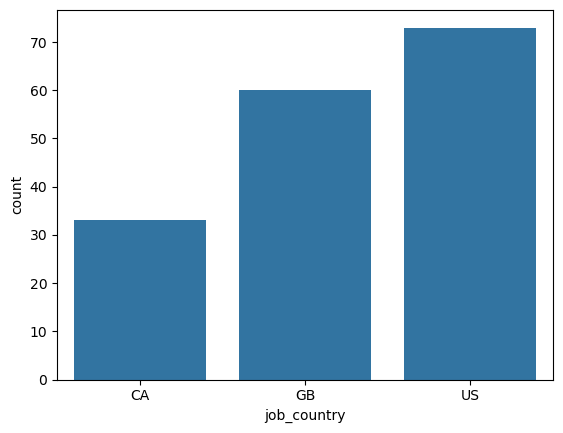

In [21]:
import seaborn as sns

sns.countplot(x="job_country", data=df)

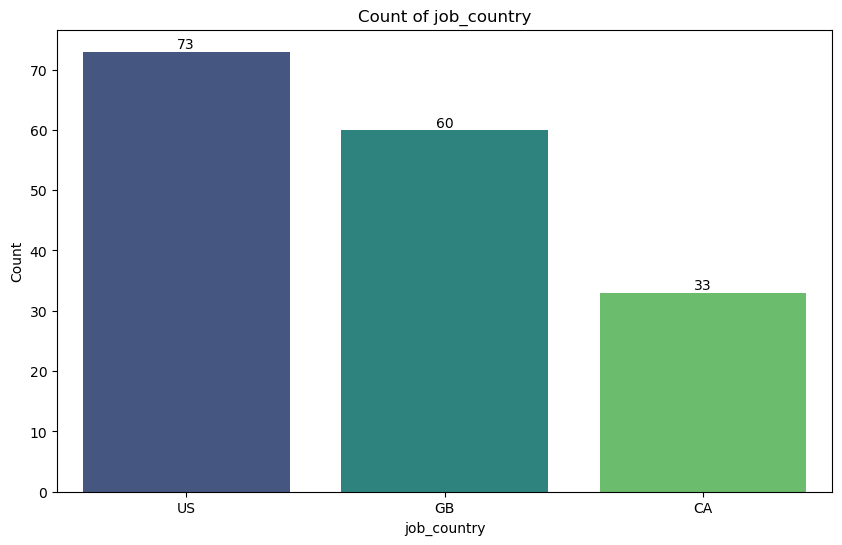

Count of job_country Categories:
US    73
GB    60
CA    33
Name: job_country, dtype: int64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a count plot with value counts displayed
sns.countplot(x="job_country", data=df, palette='viridis', order=df['job_country'].value_counts().index)

# Display the value counts on top of each bar
for index, value in enumerate(df['job_country'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel('job_country')
plt.ylabel('Count')
plt.title('Count of job_country')

# Show the plot
plt.show()


# Display the count of each job_title category
Jobs_Per_Country = df["job_country"].value_counts()
print("Count of job_country Categories:")
print(Jobs_Per_Country)


<Axes: xlabel='count', ylabel='employer_company_type'>

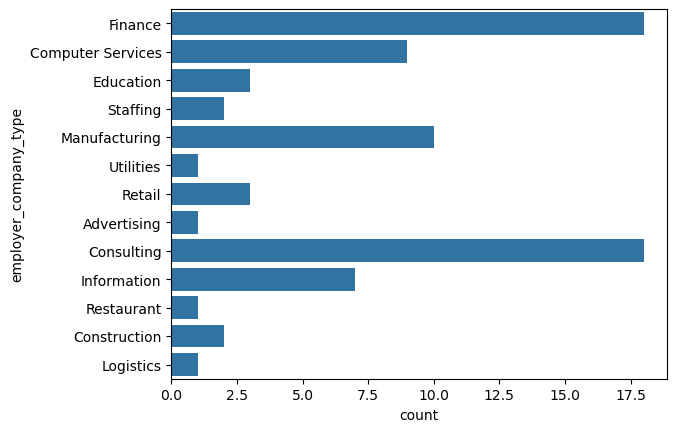

In [23]:
import seaborn as sns

sns.countplot(y="employer_company_type", data=df)

In [24]:
df.nunique()

job_employment_type          4
job_title                   99
job_apply_link             166
job_description            153
job_city                    70
job_country                  3
job_posted_at_timestamp    154
employer_website            88
employer_company_type       13
dtype: int64

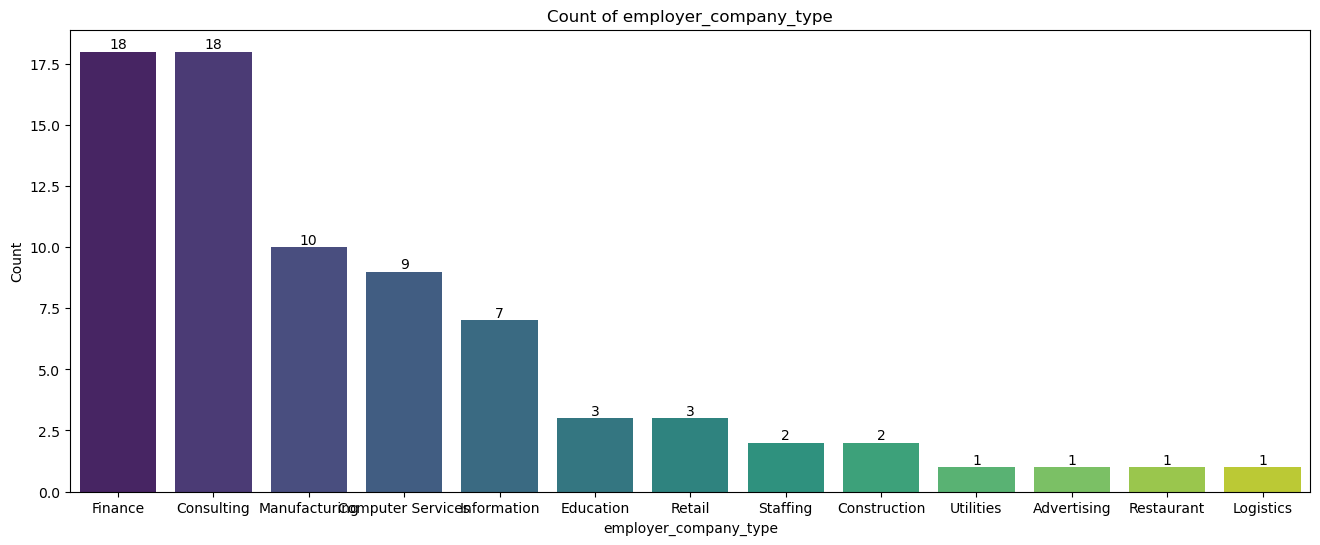

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(16, 6))

# Create a count plot with value counts displayed
sns.countplot(x="employer_company_type", data=df, palette='viridis', order=df["employer_company_type"].value_counts().index)

# Display the value counts on top of each bar
for index, value in enumerate(df["employer_company_type"].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel("employer_company_type")
plt.ylabel('Count')
plt.title('Count of employer_company_type')

# Show the plot
plt.show()

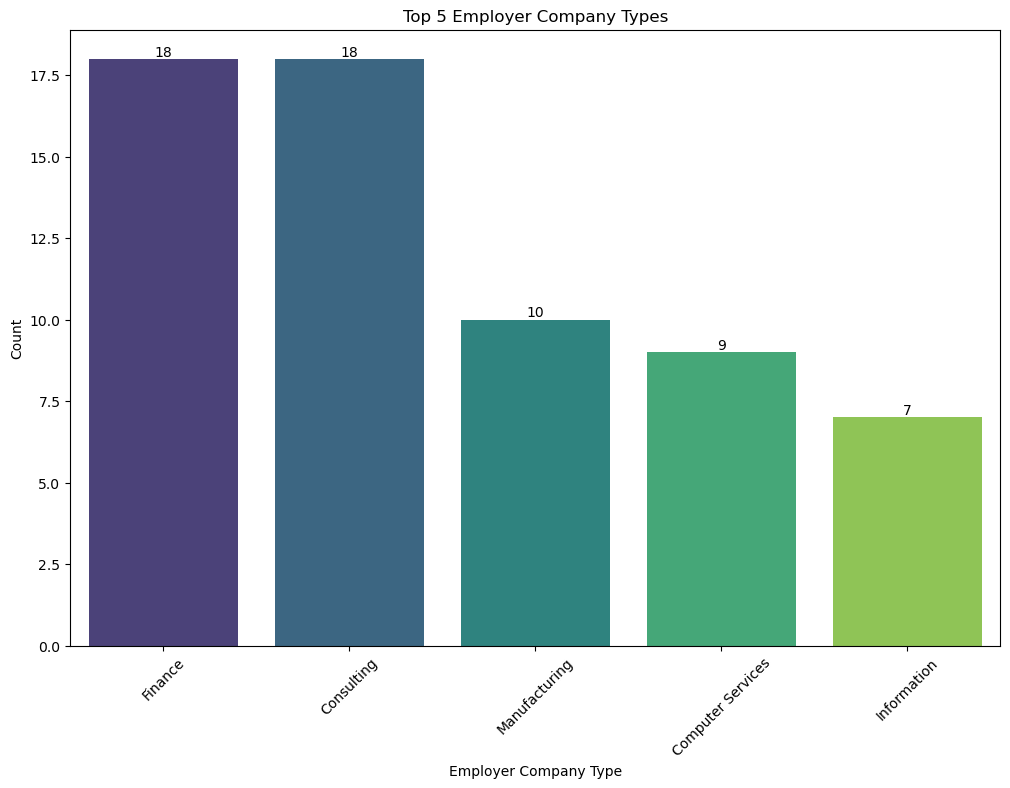

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Get the top five employer_company_type counts
top_employer_types = df['employer_company_type'].value_counts().head(5)

# Create a bar plot
sns.barplot(x=top_employer_types.index, y=top_employer_types, palette='viridis')

# Display the count values on top of each bar
for index, value in enumerate(top_employer_types):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Employer Company Type')
plt.ylabel('Count')
plt.title('Top 5 Employer Company Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [27]:
# Display the count of each job_title category
top_employer_types = df["employer_company_type"].value_counts()
print("Count of employer_company_typeCategories:")
print(top_employer_types )
#top_employer_types

Count of employer_company_typeCategories:
Finance              18
Consulting           18
Manufacturing        10
Computer Services     9
Information           7
Education             3
Retail                3
Staffing              2
Construction          2
Utilities             1
Advertising           1
Restaurant            1
Logistics             1
Name: employer_company_type, dtype: int64


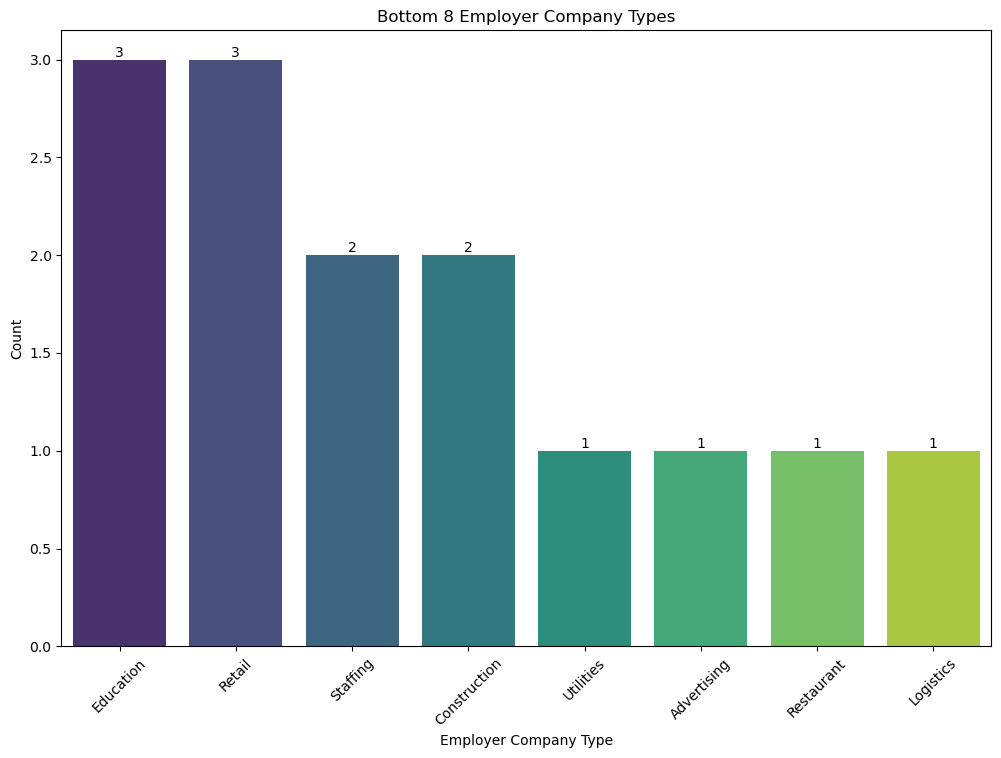

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Get the bottom eight employer_company_type counts
bottom_employer_types = df['employer_company_type'].value_counts().tail(8)

# Create a bar plot
sns.barplot(x=bottom_employer_types.index, y=bottom_employer_types, palette='viridis')

# Display the count values on top of each bar
for index, value in enumerate(bottom_employer_types):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Employer Company Type')
plt.ylabel('Count')
plt.title('Bottom 8 Employer Company Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Observations

- Finance: There are 18 job postings associated with companies in the finance sector.
- Consulting: Another 18 job postings are related to consulting firms.
- Manufacturing: There are 10 job postings in the manufacturing industry.
- Computer Services: 9 job postings are linked to companies providing computer services.
- Information: 7 job postings are associated with companies in the information sector.
- Education: 3 job postings are from the education sector.
- Retail: There are 3 job postings in the retail industry.
- Staffing: 2 job postings are related to staffing agencies.
- Construction: 2 job postings are in the construction industry.
- Utilities: 1 job posting is linked to a utilities company.
- Advertising: 1 job posting is from the advertising sector.
- Restaurant: 1 job posting is related to the restaurant industry.
- Logistics: 1 job posting is associated with logistics.
# Implications for Job Seekers:

- Diversify Job Search: Job seekers may want to consider diversifying their job search across various industries, especially those with a higher number of job postings, such as finance and consulting.
- Industry Preferences: Depending on individual preferences and career goals, job seekers may focus on industries that align with their interests and skills. For example, if someone is interested in technology, they might prioritize job postings in the "Computer Services" or "Information" categories.
- Competition Awareness: Knowing the number of job postings in each industry can give job seekers insights into the level of competition. Industries with fewer job postings may have more competitive hiring processes.

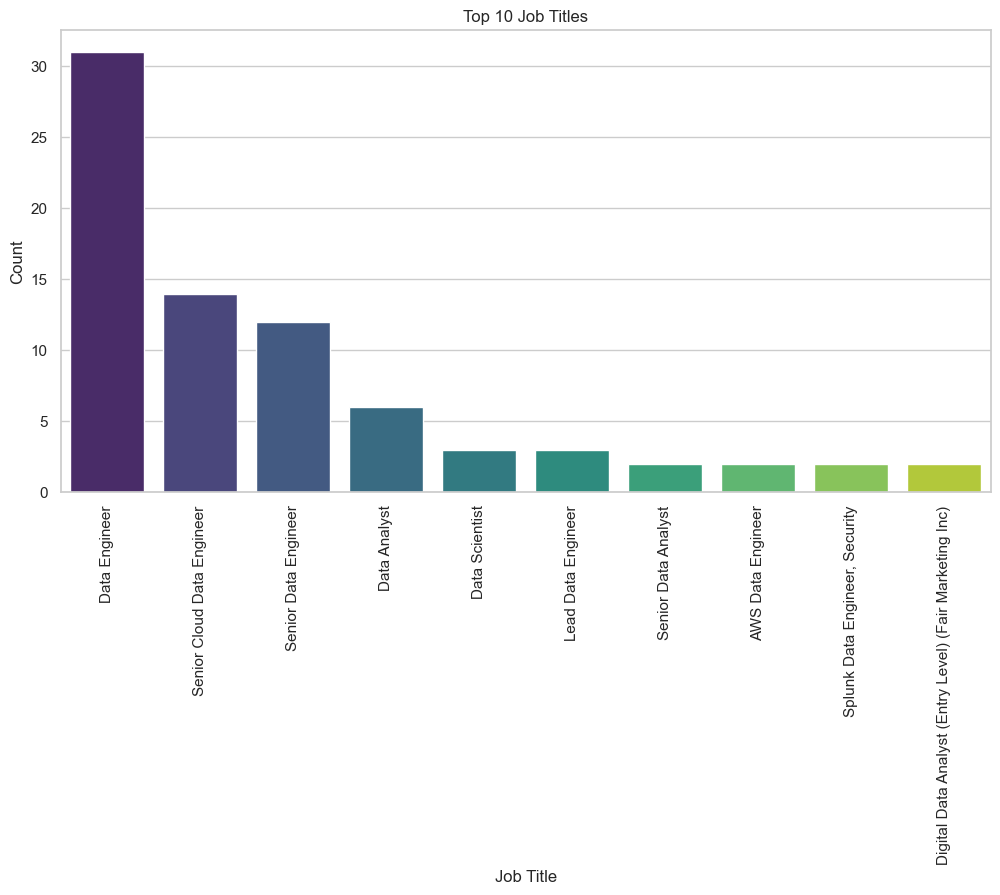

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
top_job_titles = df['job_title'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


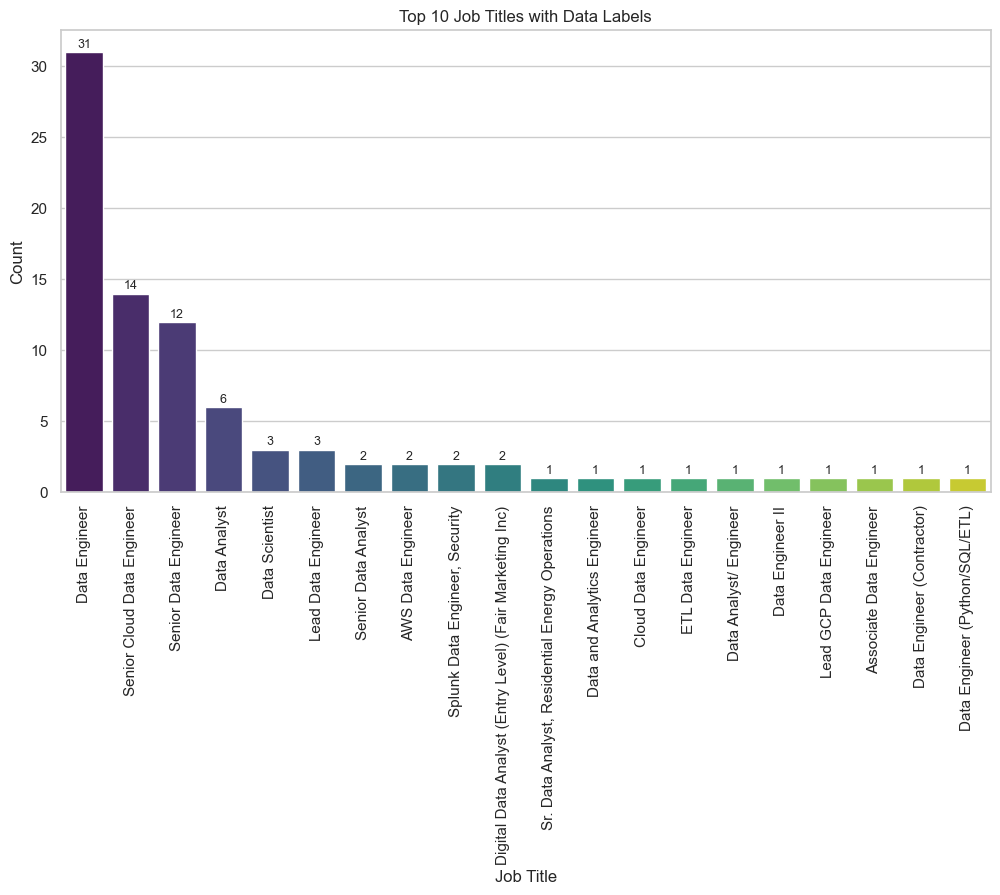

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
top_job_titles = df['job_title'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(top_job_titles):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Job Titles with Data Labels')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [31]:
# Display the count of each job_title category
top_job_titles = df['job_title'].value_counts()
print("Count of job_title Categories:")
print(top_job_titles)

Count of job_title Categories:
Data Engineer                                                  31
Senior Cloud Data Engineer                                     14
Senior Data Engineer                                           12
Data Analyst                                                    6
Data Scientist                                                  3
                                                               ..
Lead Data                                                       1
Google DevOps / Data Engineer - London - Financial Services     1
Data Engineer (Scala)                                           1
Data Analyst, Management Data Analysis                          1
Vibration Test & Data Analysis Engineer                         1
Name: job_title, Length: 99, dtype: int64


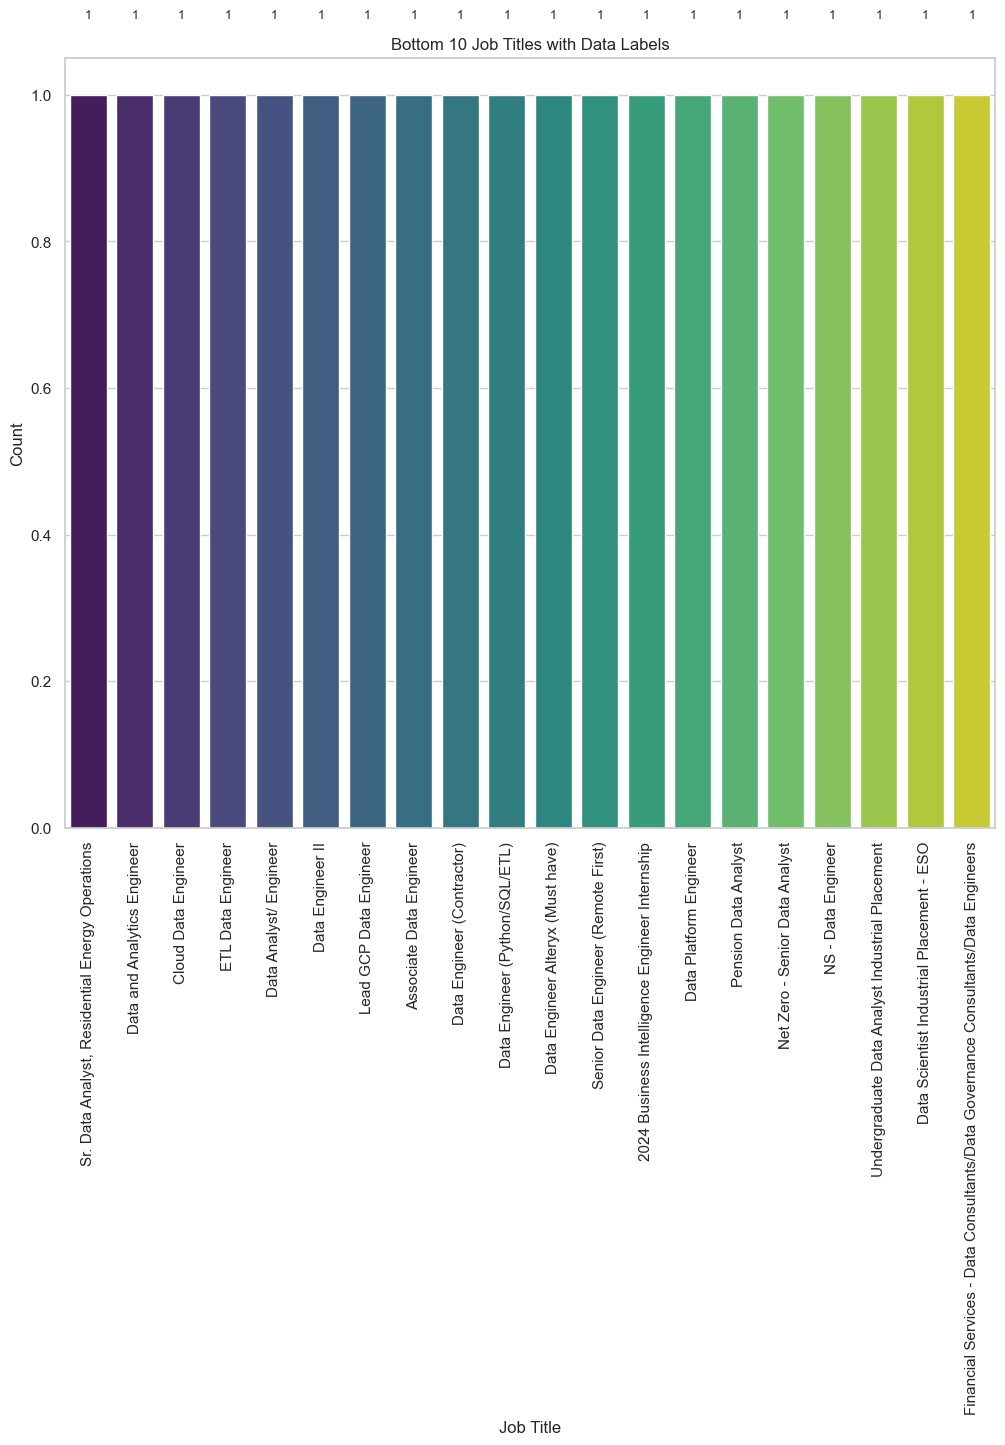

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Bottom Ten Job Titles
bottom_job_titles = df['job_title'].value_counts().nsmallest(20)

plt.figure(figsize=(12, 10))
barplot = sns.barplot(x=bottom_job_titles.index, y=bottom_job_titles.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(bottom_job_titles):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Bottom 10 Job Titles with Data Labels')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='job_employment_type', ylabel='count'>

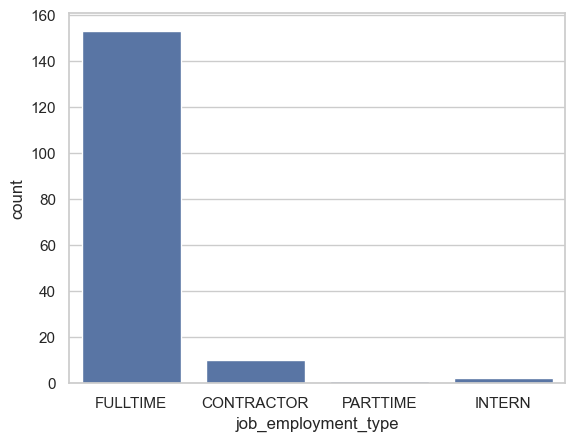

In [33]:
import seaborn as sns

sns.countplot(x="job_employment_type", data=df)

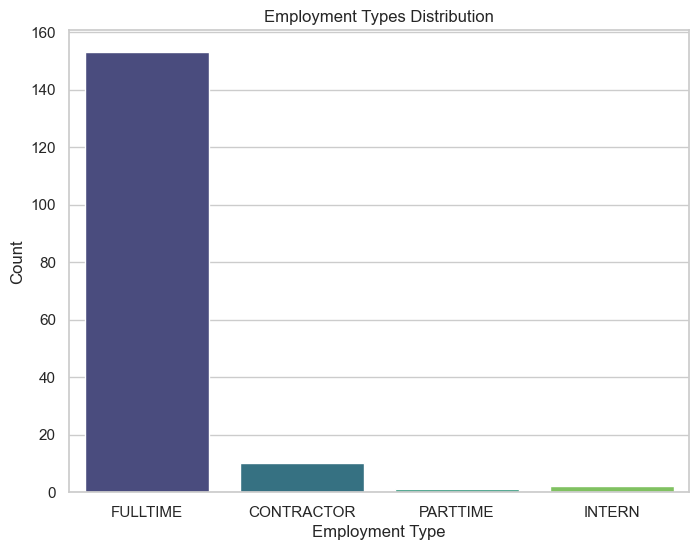

In [34]:
# Employment Types
plt.figure(figsize=(8, 6))
sns.countplot(x="job_employment_type", data=df, palette='viridis')
plt.title('Employment Types Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

In [35]:
# Display the count of each job_employment_type category
job_employment_type = df["job_employment_type"].value_counts()
print("Count of job_employment_type Categories:")
print(job_employment_type)

Count of job_employment_type Categories:
FULLTIME      153
CONTRACTOR     10
INTERN          2
PARTTIME        1
Name: job_employment_type, dtype: int64


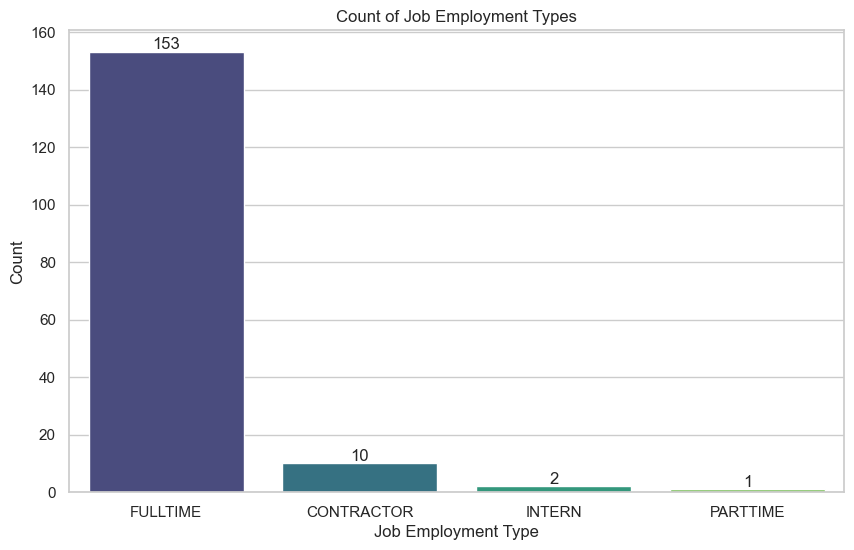

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a count plot with value counts displayed
sns.countplot(x="job_employment_type", data=df, palette='viridis', order=df['job_employment_type'].value_counts().index)

# Display the value counts on top of each bar
for index, value in enumerate(df['job_employment_type'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Job Employment Type')
plt.ylabel('Count')
plt.title('Count of Job Employment Types')

# Show the plot
plt.show()


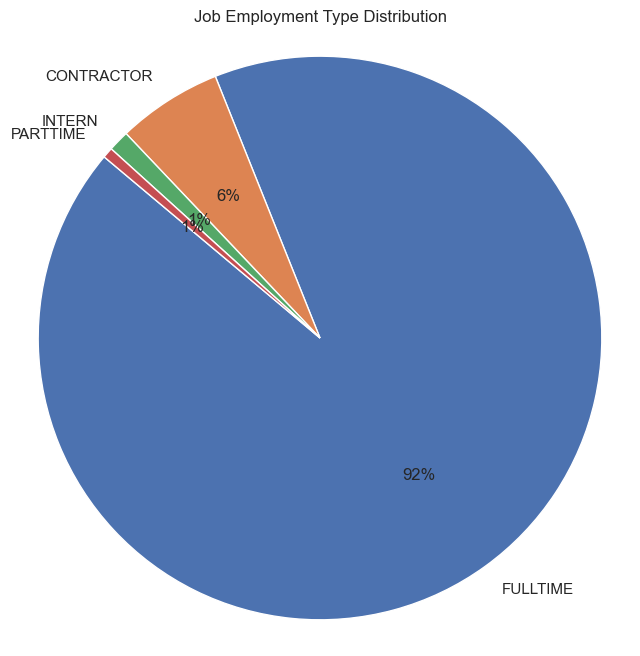

In [37]:
# Calculate value counts for job employment types
employment_type_counts = df['job_employment_type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Job Employment Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [38]:
df.columns

Index(['job_employment_type', 'job_title', 'job_apply_link', 'job_description',
       'job_city', 'job_country', 'job_posted_at_timestamp',
       'employer_website', 'employer_company_type'],
      dtype='object')

In [39]:
# Display the count of each job_city category
job_city = df["job_city"].value_counts()
print("Count of job_city Categories:")
print(job_city)
#job_city

Count of job_city Categories:
London             29
Toronto            11
Montréal            4
Boston              4
New York            4
                   ..
Ogden               1
Houston             1
Cincinnati          1
Irving              1
Fort Lauderdale     1
Name: job_city, Length: 70, dtype: int64


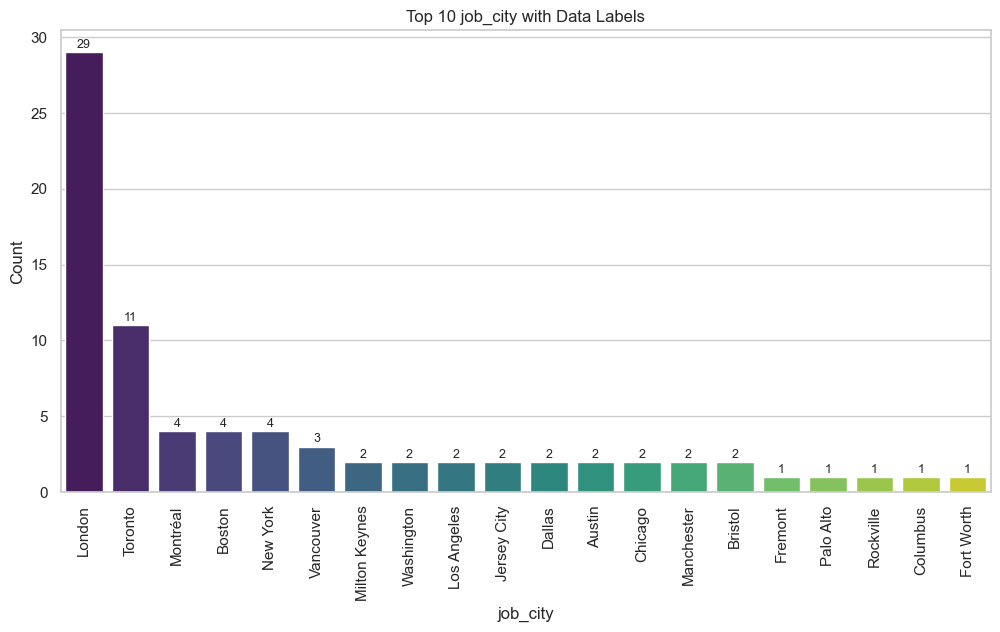

In [40]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
top_job_city = df["job_city"].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_job_city.index, y=top_job_city.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(top_job_city):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 job_city with Data Labels')
plt.xlabel("job_city")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

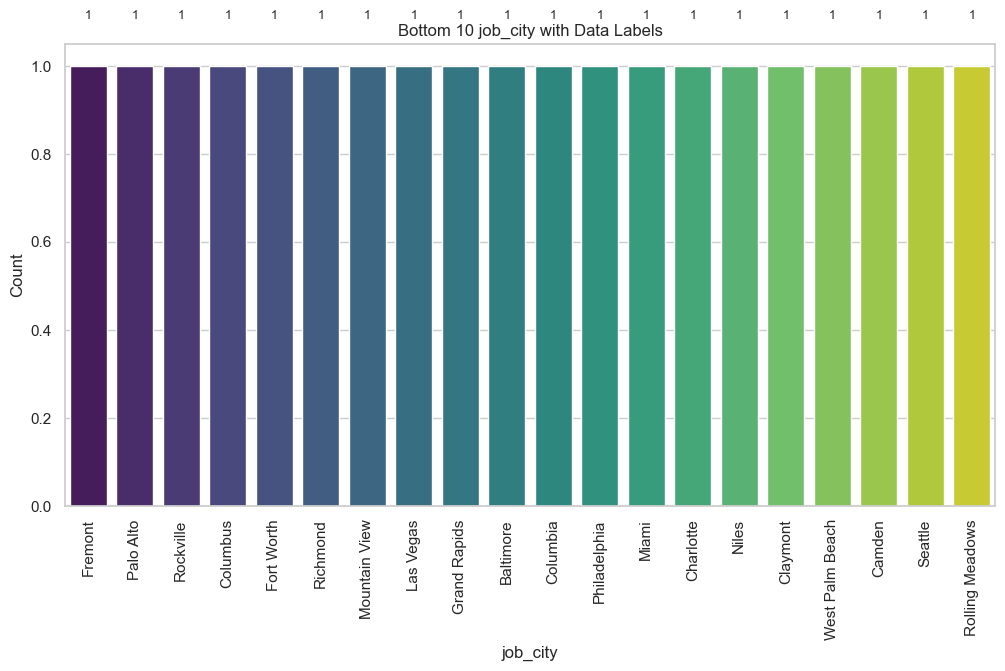

In [41]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
bottom_job_city = df["job_city"].value_counts().nsmallest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=bottom_job_city.index, y=bottom_job_city.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(bottom_job_city):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Bottom 10 job_city with Data Labels')
plt.xlabel("job_city")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

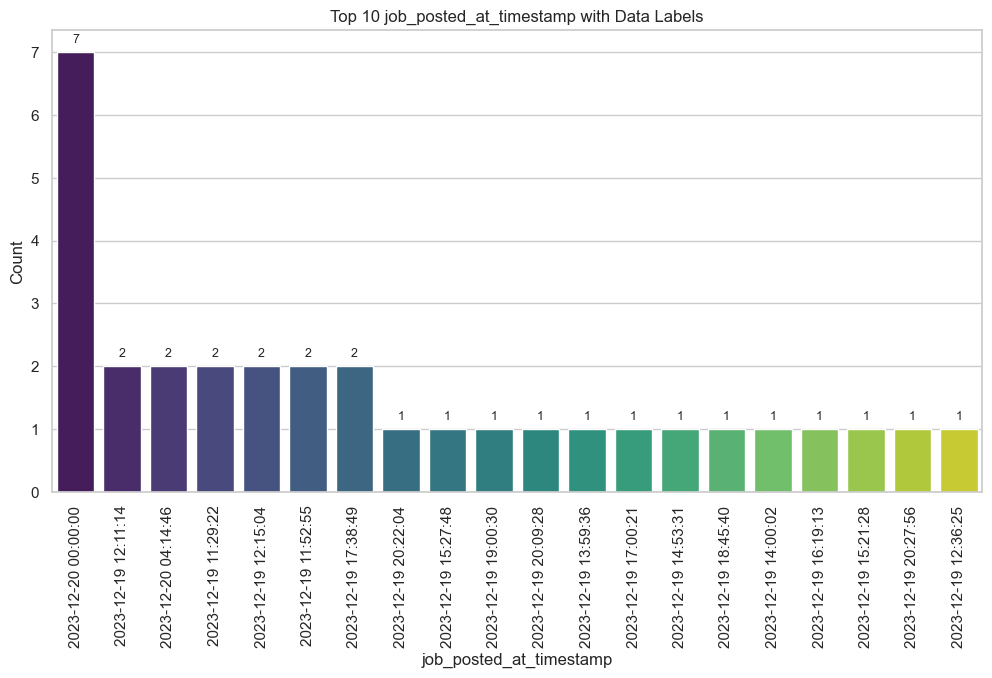

In [42]:
# Top Ten job_posted_at_timestamp
job_posted_at_timestamp = df["job_posted_at_timestamp"].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=job_posted_at_timestamp.index, y=job_posted_at_timestamp.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(job_posted_at_timestamp):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 job_posted_at_timestamp with Data Labels')
plt.xlabel("job_posted_at_timestamp")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

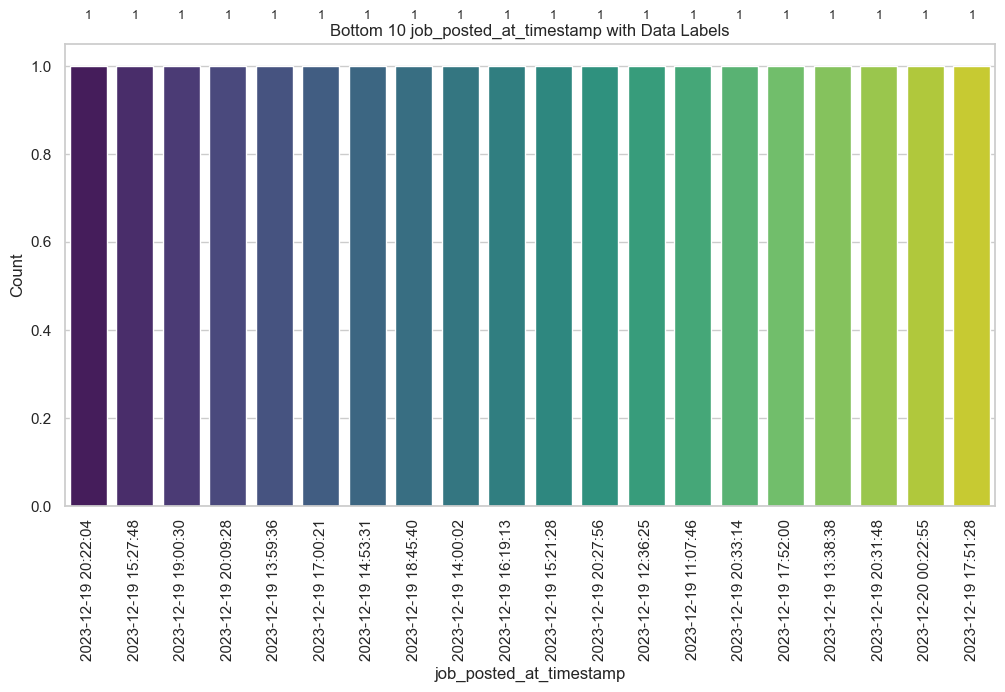

In [43]:
# Bottom Ten job_posted_at_timestamp
b_job_posted_at_timestamp = df["job_posted_at_timestamp"].value_counts().nsmallest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=b_job_posted_at_timestamp.index, y=b_job_posted_at_timestamp.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(b_job_posted_at_timestamp):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Bottom 10 job_posted_at_timestamp with Data Labels')
plt.xlabel("job_posted_at_timestamp")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [44]:
job_posted_at_timestamp

2023-12-20 00:00:00    7
2023-12-19 12:11:14    2
2023-12-20 04:14:46    2
2023-12-19 11:29:22    2
2023-12-19 12:15:04    2
2023-12-19 11:52:55    2
2023-12-19 17:38:49    2
2023-12-19 20:22:04    1
2023-12-19 15:27:48    1
2023-12-19 19:00:30    1
2023-12-19 20:09:28    1
2023-12-19 13:59:36    1
2023-12-19 17:00:21    1
2023-12-19 14:53:31    1
2023-12-19 18:45:40    1
2023-12-19 14:00:02    1
2023-12-19 16:19:13    1
2023-12-19 15:21:28    1
2023-12-19 20:27:56    1
2023-12-19 12:36:25    1
Name: job_posted_at_timestamp, dtype: int64

In [45]:
# Display the count of each job_city category
job_posted_at_timestamp = df["job_posted_at_timestamp"].value_counts()
print("Count of job_posted_at_timestamp Categories:")
print(job_posted_at_timestamp)

Count of job_posted_at_timestamp Categories:
2023-12-20 00:00:00    7
2023-12-19 12:11:14    2
2023-12-20 04:14:46    2
2023-12-19 11:29:22    2
2023-12-19 12:15:04    2
                      ..
2023-12-19 12:41:10    1
2023-12-19 22:01:47    1
2023-12-19 16:06:25    1
2023-12-19 11:42:17    1
2023-12-19 10:42:36    1
Name: job_posted_at_timestamp, Length: 154, dtype: int64


In [46]:
# Display the count of each employer_website category
employer_website = df["employer_website"].value_counts()
print("Count of employer_website:")
#print(employer_website)
employer_website

Count of employer_website:


http://www.bdo.com               14
http://www.agoda.com              4
http://www.rbc.com                3
http://www.tesla.com              3
http://www.geturgently.com        2
                                 ..
http://www.publicisgroupe.com     1
http://www.citigroup.com          1
http://www.hcltech.com            1
http://www.version1.com           1
https://talener.com               1
Name: employer_website, Length: 88, dtype: int64

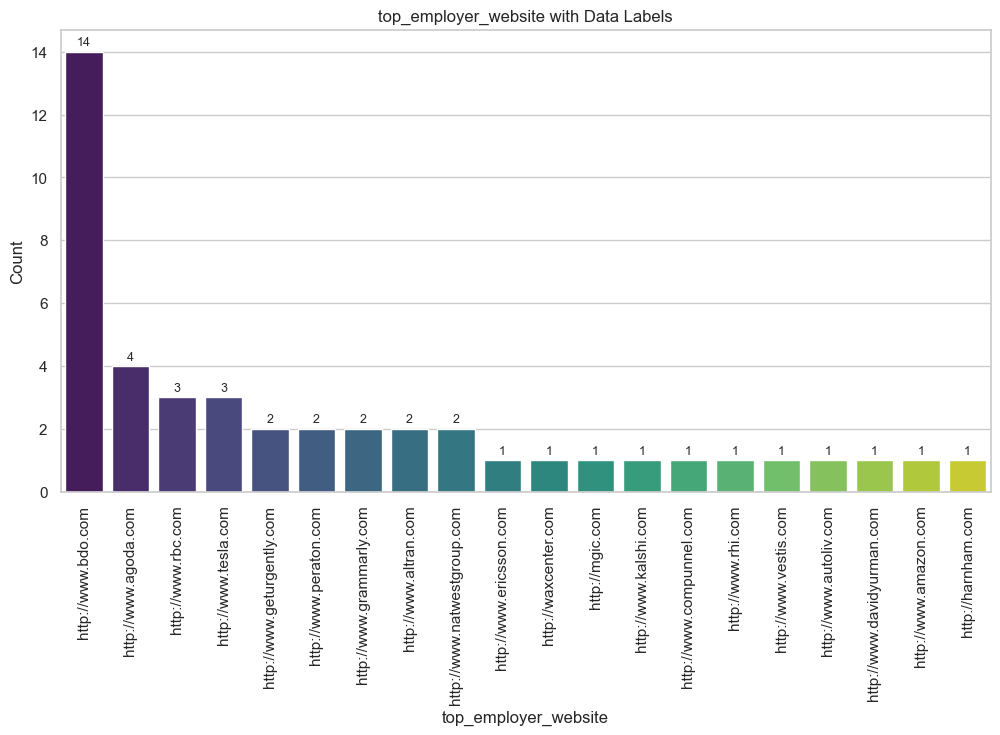

In [47]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
top_employer_website = df["employer_website"].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_employer_website.index, y=top_employer_website.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(top_employer_website):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('top_employer_website with Data Labels')
plt.xlabel("top_employer_website")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

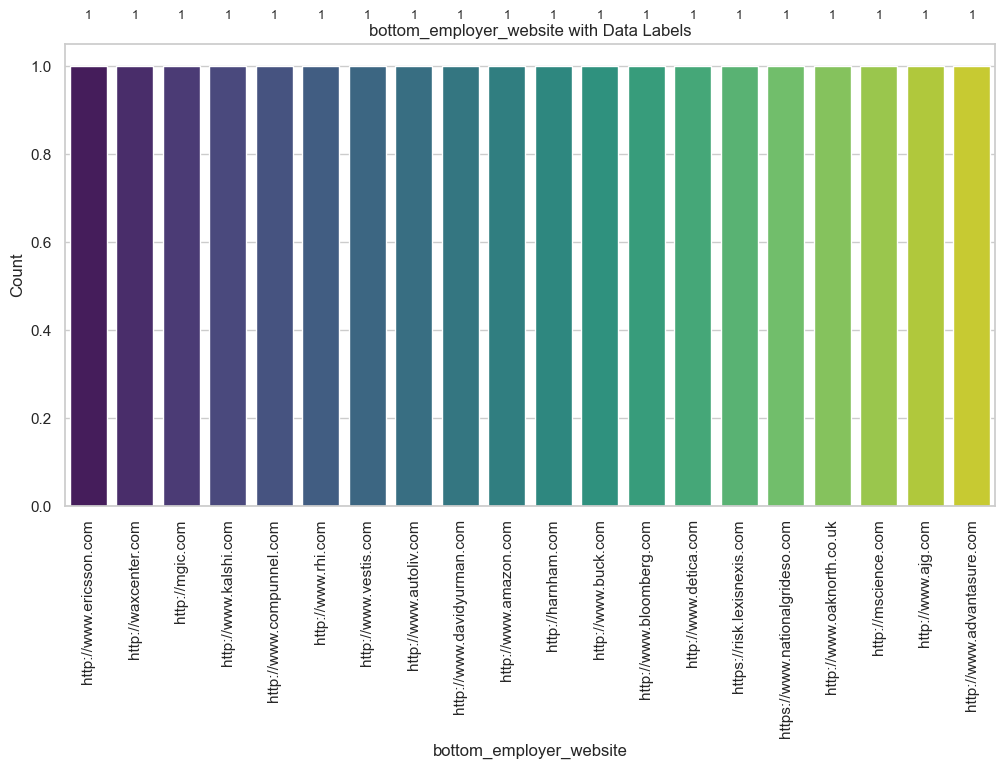

In [48]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
bottom_employer_website = df["employer_website"].value_counts().nsmallest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=bottom_employer_website.index, y=bottom_employer_website.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(bottom_employer_website):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('bottom_employer_website with Data Labels')
plt.xlabel("bottom_employer_website")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

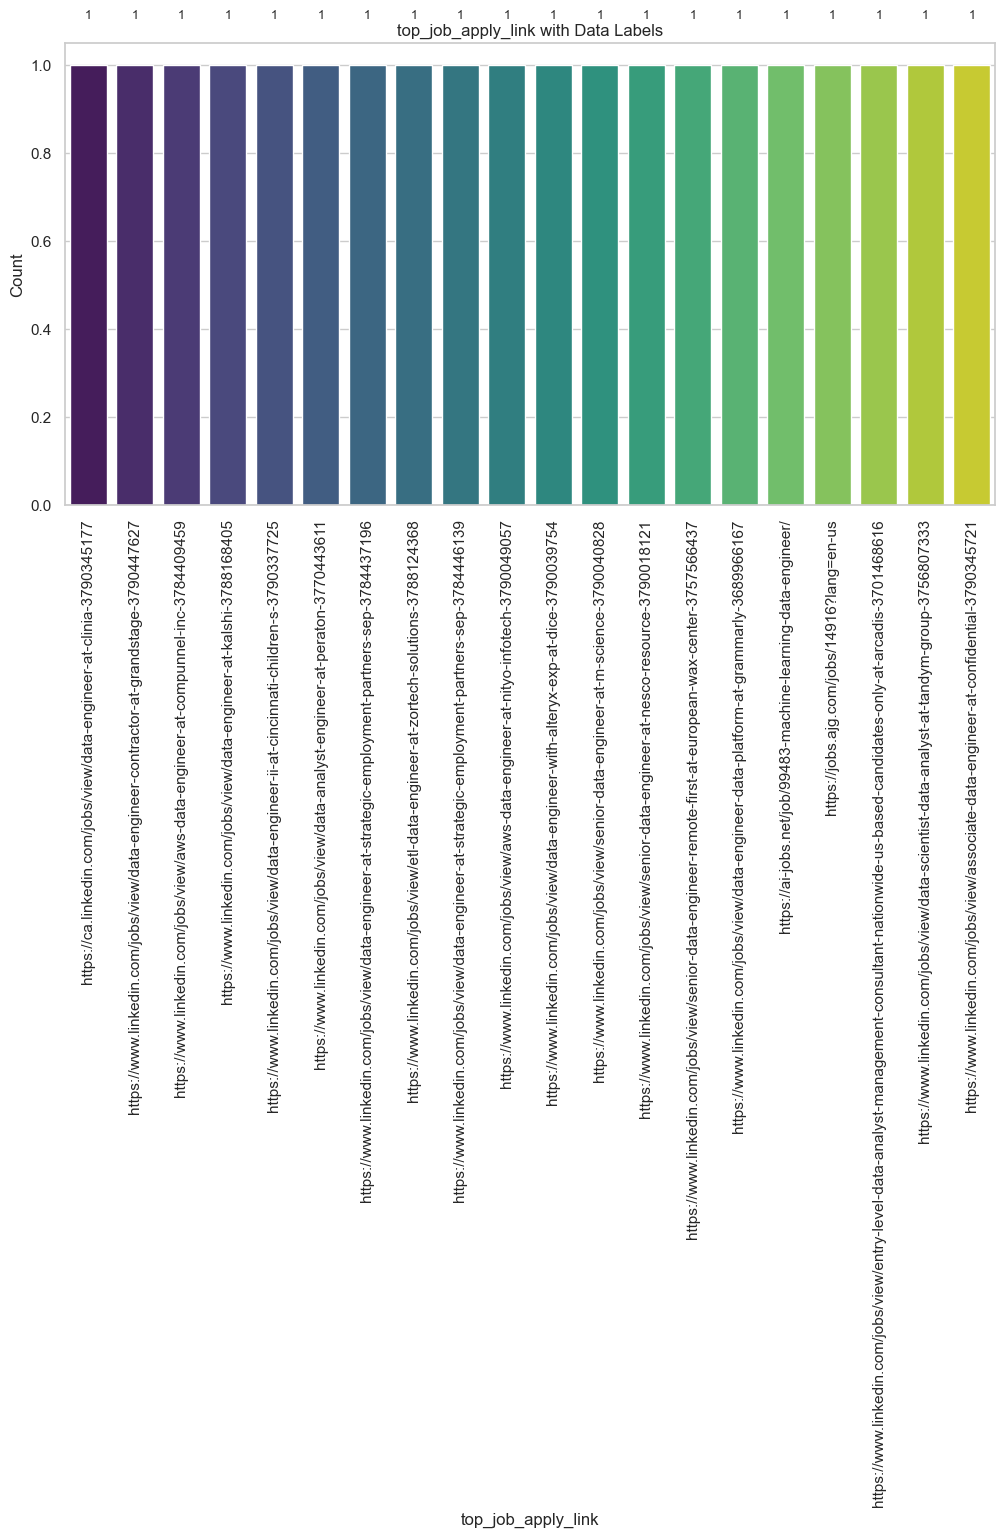

In [49]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Top Ten Job Titles
top_job_apply_link = df["job_apply_link"].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_job_apply_link.index, y=top_job_apply_link.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(top_job_apply_link):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title("top_job_apply_link with Data Labels")
plt.xlabel("top_job_apply_link")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

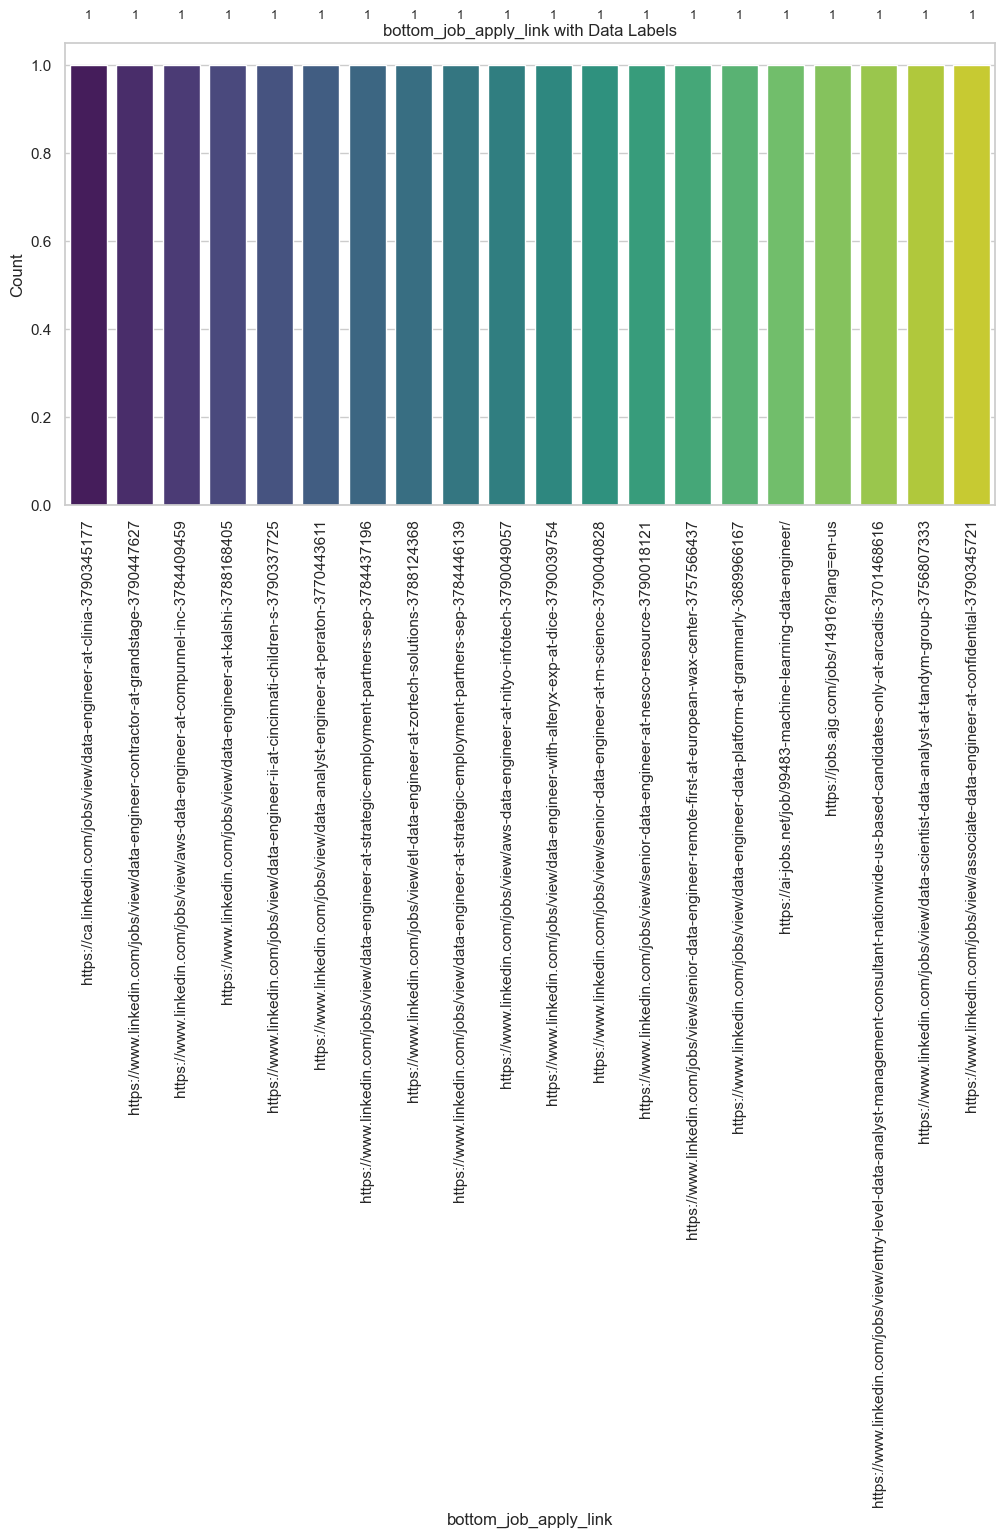

In [50]:
# Top Ten Job Titles
bottom_job_apply_link = df["job_apply_link"].value_counts().nsmallest(20)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=bottom_job_apply_link.index, y=bottom_job_apply_link.values, palette='viridis')

# Add data labels on top of each bar
for index, value in enumerate(bottom_job_apply_link):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title("bottom_job_apply_link with Data Labels")
plt.xlabel("bottom_job_apply_link")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

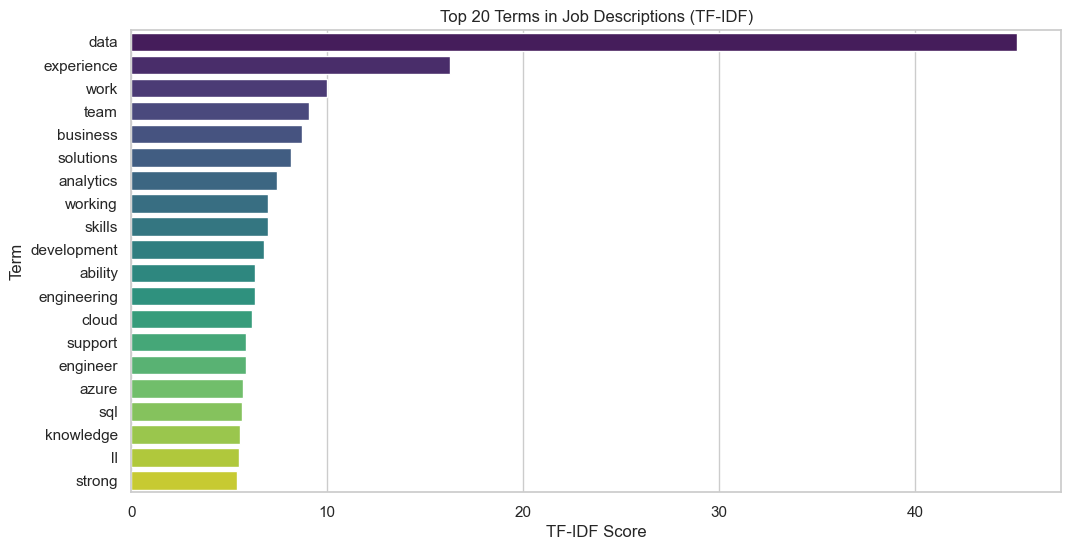

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming 'job_description' is the column containing job descriptions
job_descriptions = df['job_description'].dropna()

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(job_descriptions)

# Summing TF-IDF scores across all documents for each term
term_scores = tfidf_matrix.sum(axis=0)

# Getting the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Creating a DataFrame to store term scores
term_scores_df = pd.DataFrame(data={'Term': feature_names, 'Score': term_scores.flat})

# Sorting terms by score in descending order
term_scores_df = term_scores_df.sort_values(by='Score', ascending=False)

# Visualizing the top terms
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Term', data=term_scores_df.head(20), palette='viridis')
plt.title('Top 20 Terms in Job Descriptions (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.show()


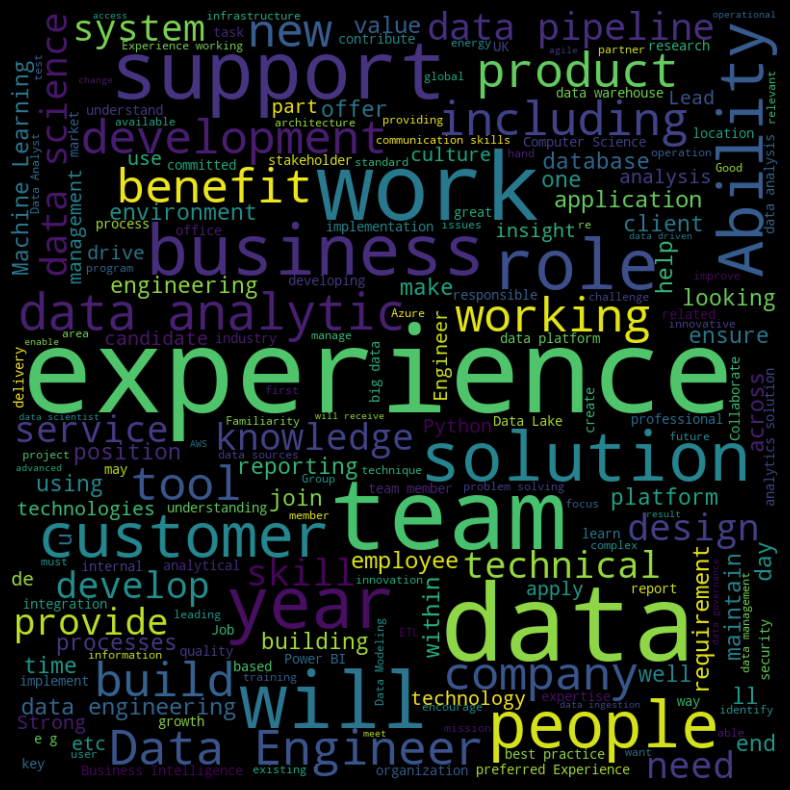

In [52]:
from wordcloud import WordCloud

job_description = df['job_description']

# Combine all job descriptions into a single string
words_str = ' '.join(job_description)

# Generate word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=None,  # You may or may not want to use stopwords
                      min_font_size=10
                     ).generate(words_str)

# Plot the WordCloud image with matplotlib
plt.figure(figsize=(10, 10), facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

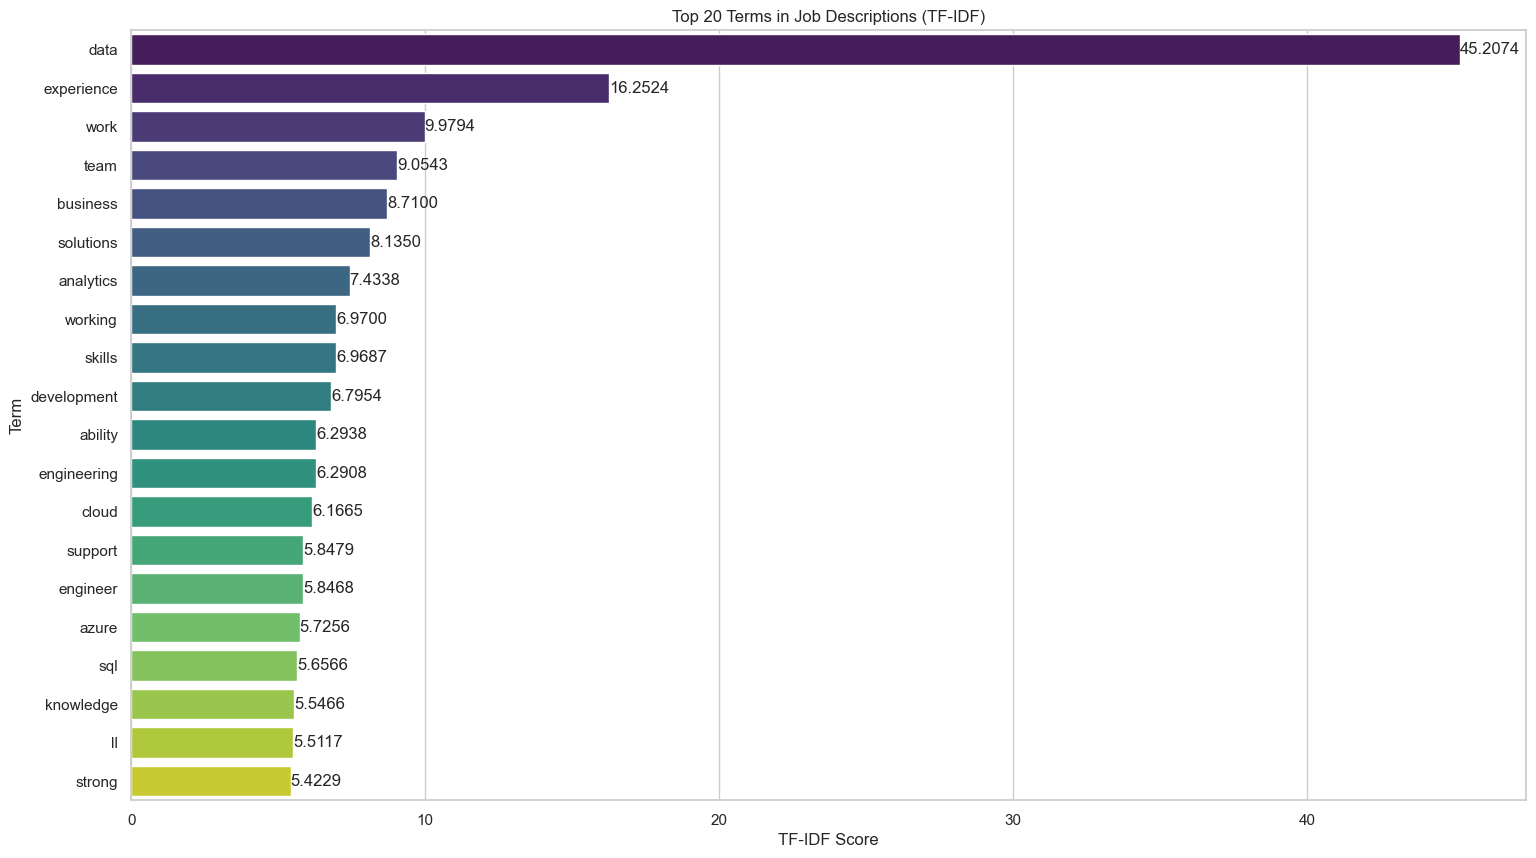

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming 'job_description' is the column containing job descriptions
job_descriptions = df['job_description'].dropna()

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(job_descriptions)

# Summing TF-IDF scores across all documents for each term
term_scores = tfidf_matrix.sum(axis=0)

# Getting the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Creating a DataFrame to store term scores
term_scores_df = pd.DataFrame(data={'Term': feature_names, 'Score': term_scores.flat})

# Sorting terms by score in descending order
term_scores_df = term_scores_df.sort_values(by='Score', ascending=False)

# Visualizing the top terms
plt.figure(figsize=(18, 10))
barplot = sns.barplot(x='Score', y='Term', data=term_scores_df.head(20), palette='viridis')
plt.title('Top 20 Terms in Job Descriptions (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')

# Adding data labels to the bars
for index, value in enumerate(term_scores_df.head(20)['Score']):
    barplot.text(value, index, f'{value:.4f}', ha='left', va='center')

plt.show()


# Bivariate Analysis

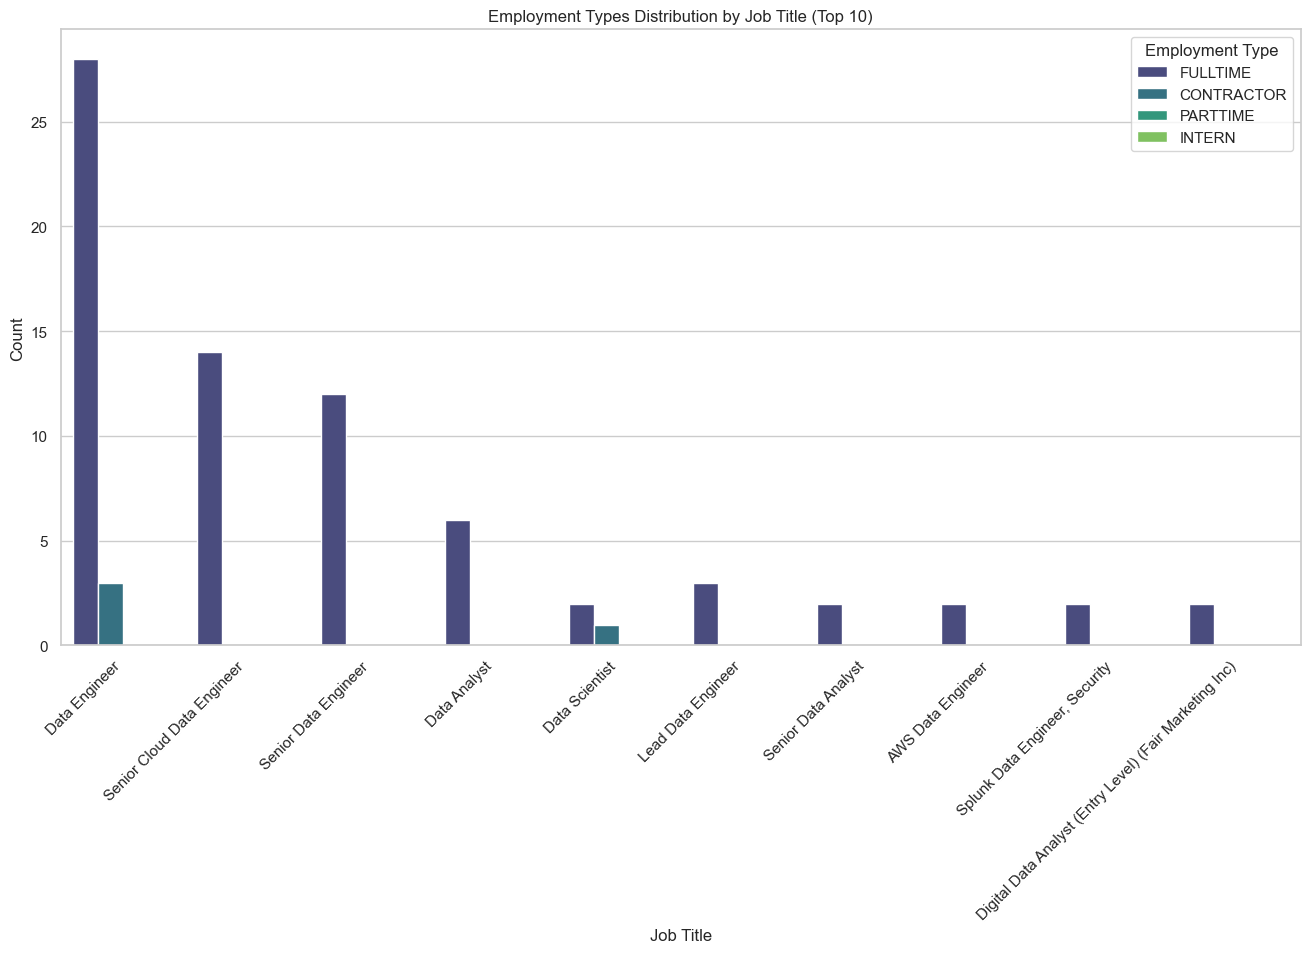

In [54]:
plt.figure(figsize=(16, 8))
sns.countplot(x="job_title", hue="job_employment_type", data=df, palette='viridis', order=df['job_title'].value_counts().index[:10])
plt.title('Employment Types Distribution by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.show()



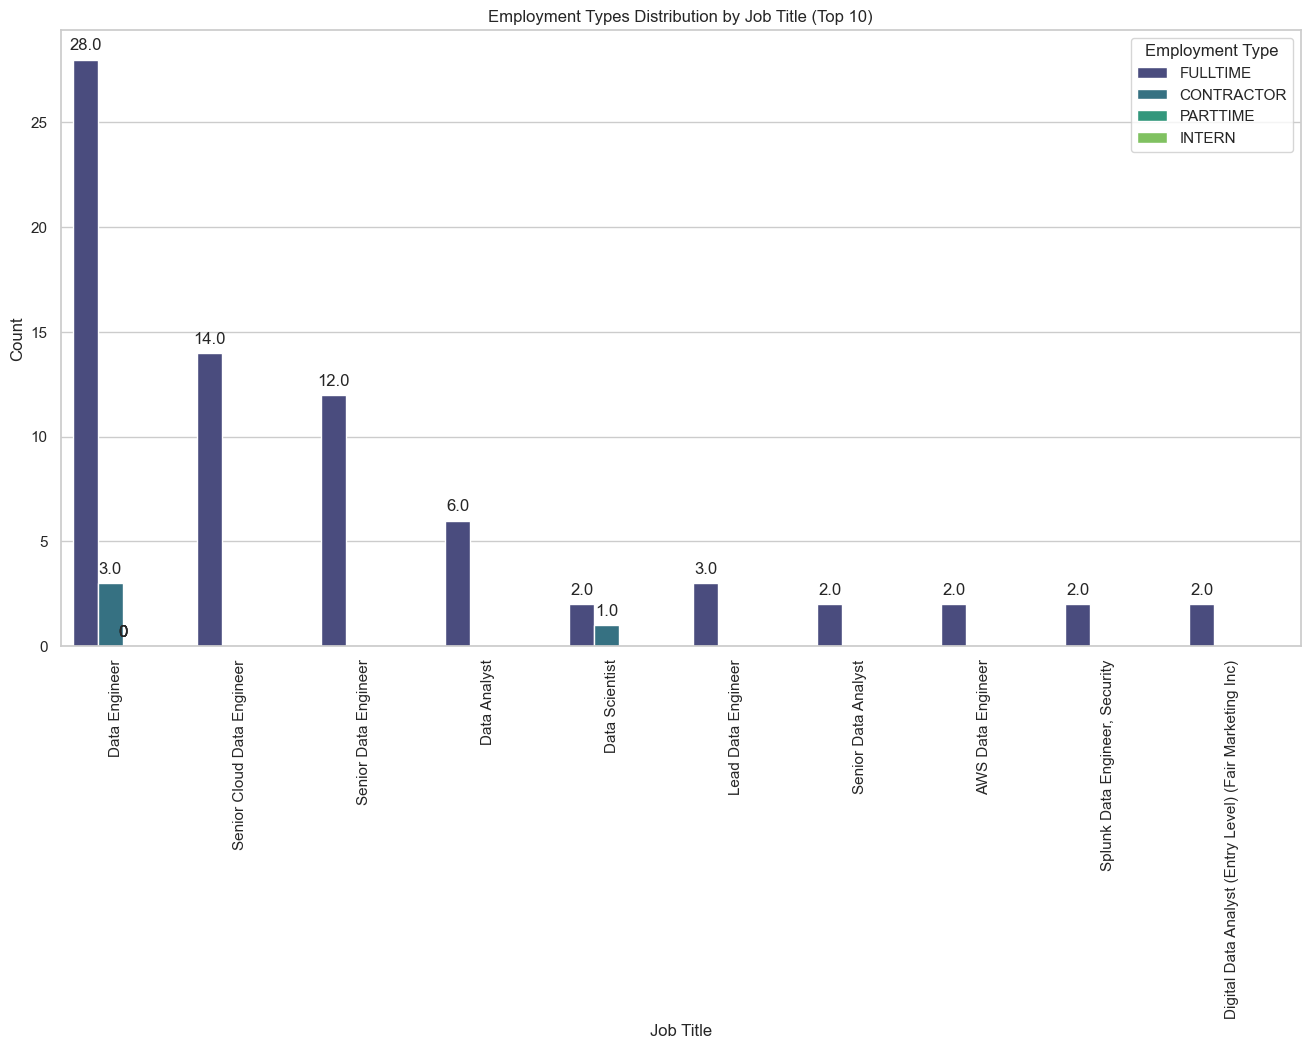

In [55]:
# Employment Types Distribution by Job Title (Top 10)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="job_title", hue="job_employment_type", data=df, palette='viridis', order=df['job_title'].value_counts().index[:10])
plt.title('Employment Types Distribution by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Employment Type')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


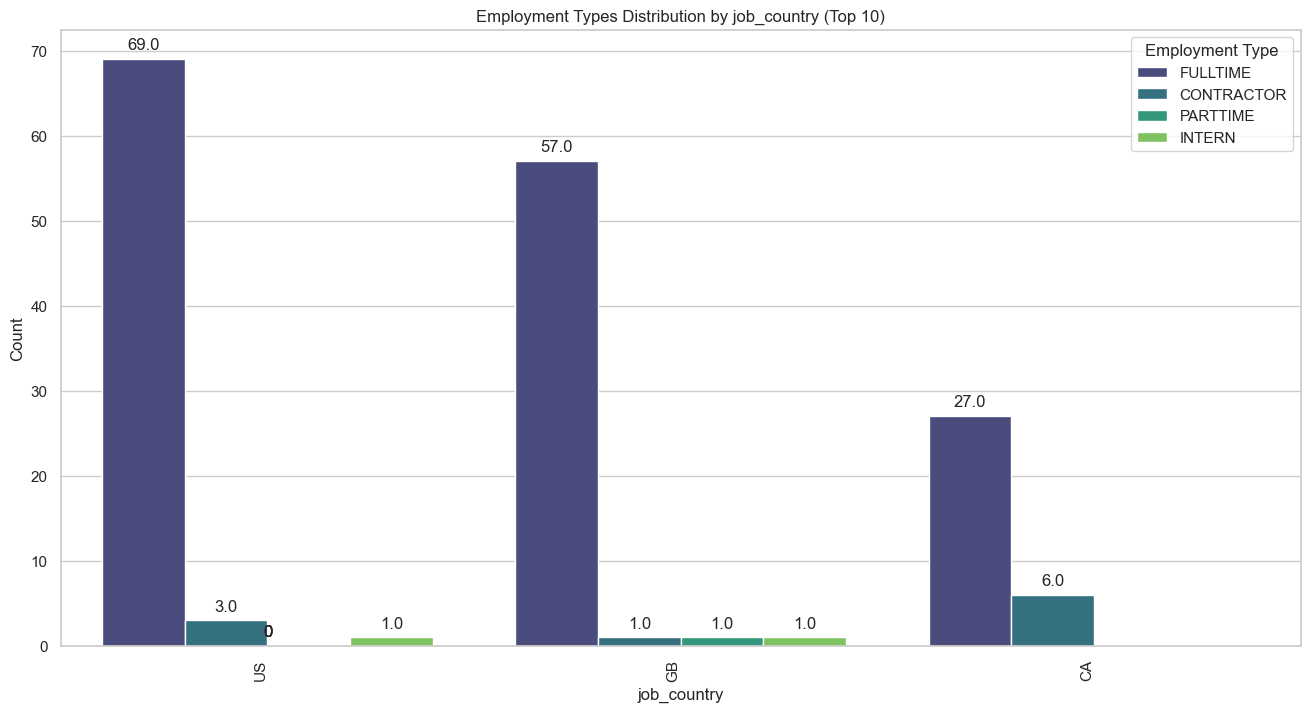

In [56]:
# Employment Types Distribution by Job Title (Top 10)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="job_country", hue="job_employment_type", data=df, palette='viridis', order=df["job_country"].value_counts().index[:10])
plt.title('Employment Types Distribution by job_country (Top 10)')
plt.xlabel('job_country')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Employment Type')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



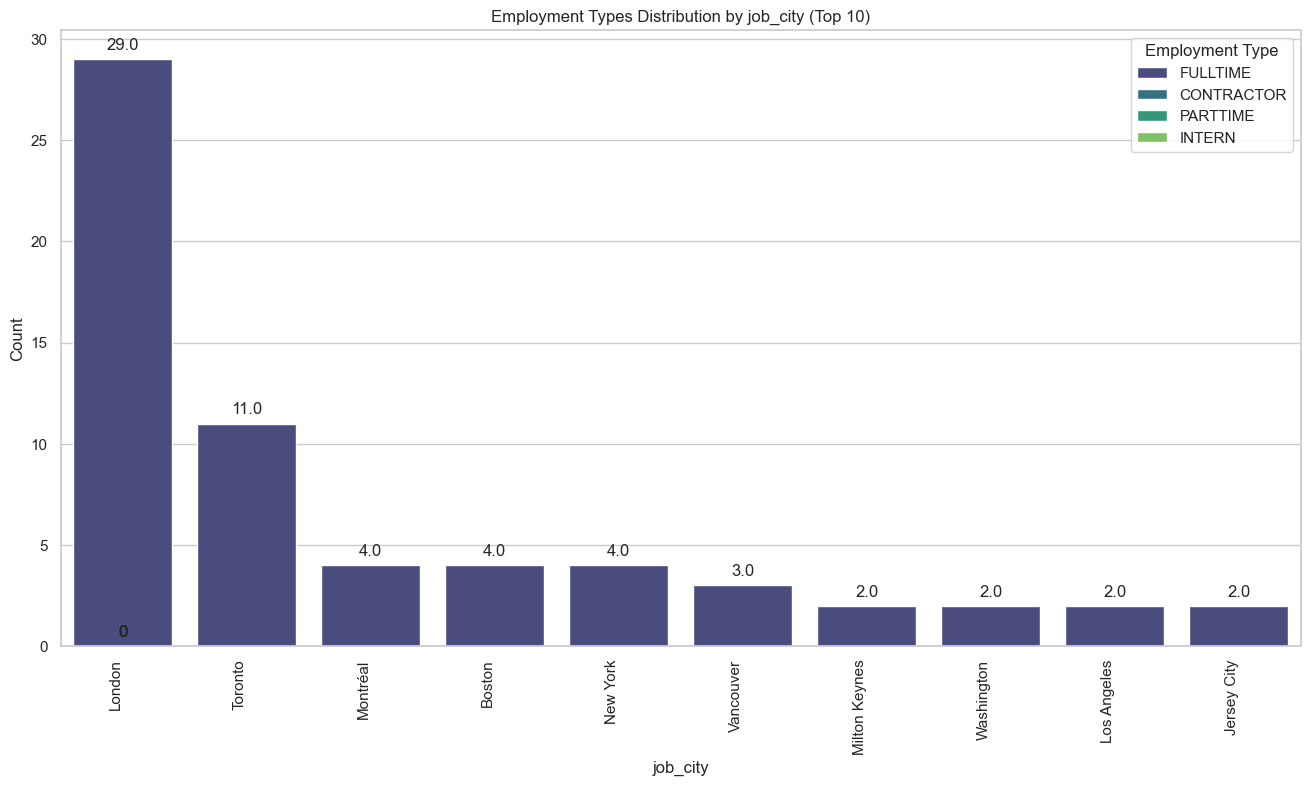

In [57]:
# Employment Types Distribution by Job Title (Top 10)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="job_city", hue="job_employment_type", data=df, palette='viridis', order=df["job_city"].value_counts().index[:10])
plt.title('Employment Types Distribution by job_city (Top 10)')
plt.xlabel("job_city")
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Employment Type')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

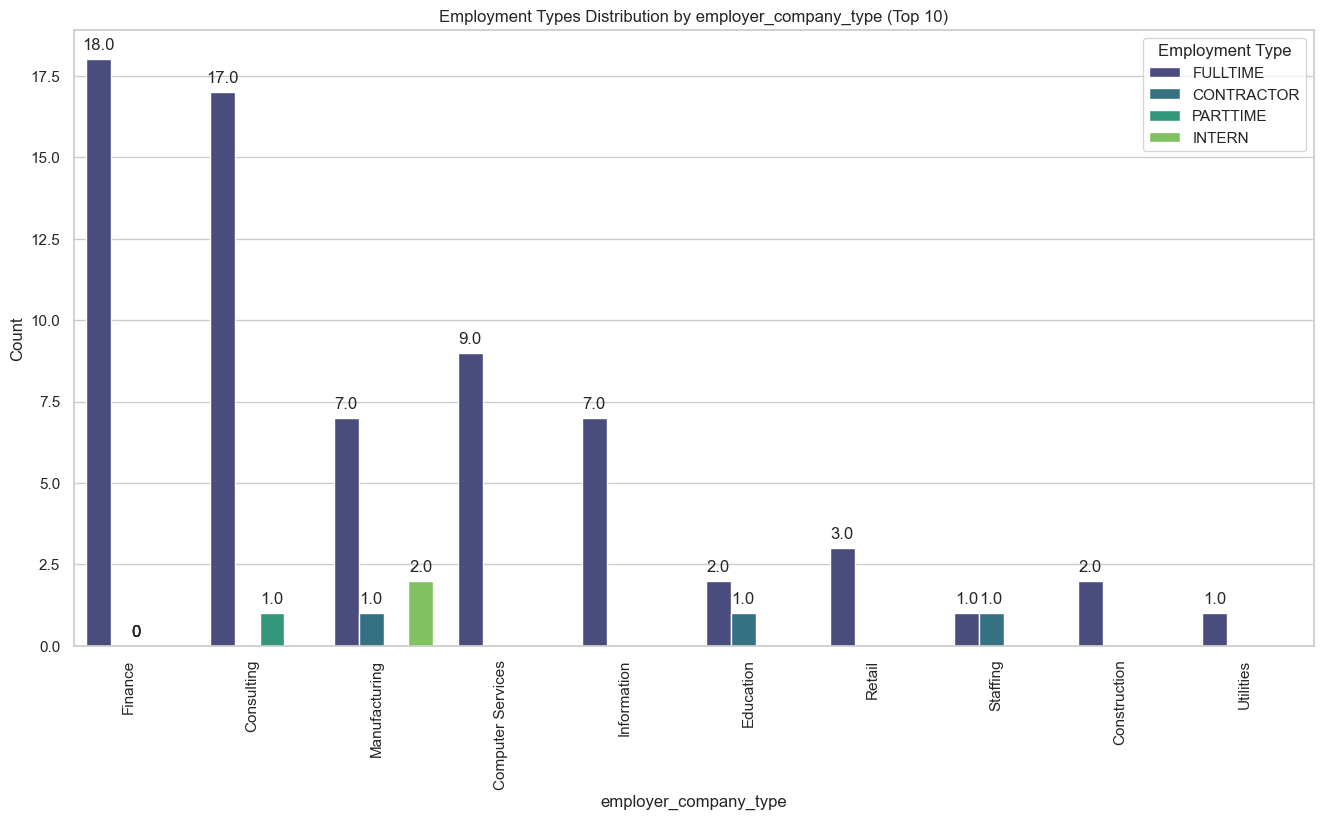

In [58]:
# Employment Types Distribution by employer_company_type (Top 10)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="employer_company_type", hue="job_employment_type", data=df, palette='viridis', order=df["employer_company_type"].value_counts().index[:10])
plt.title('Employment Types Distribution by employer_company_type (Top 10)')
plt.xlabel("employer_company_type")
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Employment Type')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()